# EDA

## 1. Imports, links, and loading

In [1]:
# Import packages

# For data manipulation
import pandas as pd
import numpy as np

# For data visualization
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Load dataset into a dataframe
df = pd.read_csv('Docs/2017_Yellow_Taxi_Trip_Data.csv')
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

## 2. Data exploration and cleaning

### 2.a. Analyze of travel's time

In [4]:
# Convert to datetime 
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# New variable for the time of each travel
df['travel_time'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['travel_time'] = df['travel_time'].dt.total_seconds() / 3600

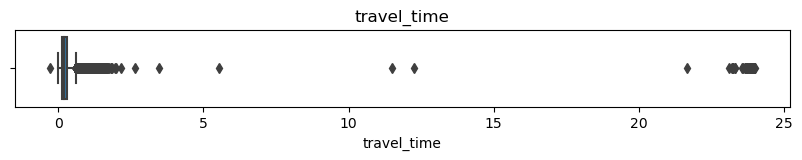

In [5]:
plt.figure(figsize=(10,1))
plt.title('travel_time')
sns.boxplot(x=df['travel_time'])
plt.show()

In [6]:
long_travel_df = df[df['travel_time'] > 5]
num_long_travels = long_travel_df.shape[0]
print("Number of trips over 5 hours:", num_long_travels)


Number of trips over 5 hours: 45


We can see that 45 trips take more than 5 hours. This is quite a rare taxi journey. Let's comparate this data with the distance made :

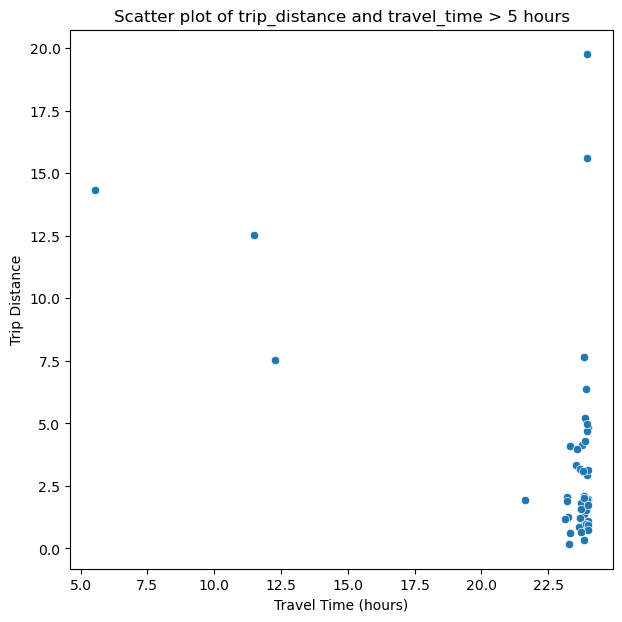

In [7]:
filtered_df = df[df['travel_time'] > 5]

plt.figure(figsize=(7,7))
plt.title('Scatter plot of trip_distance and travel_time > 5 hours')
sns.scatterplot(x=filtered_df['travel_time'], y=filtered_df['trip_distance'])
plt.xlabel('Travel Time (hours)')
plt.ylabel('Trip Distance')
plt.show()


#### Conclusion
As we can see from the graph above, these values are quite extravagant compared with others. Indeed, we can see that the value with just over 5 hours only covered around 15km. That's a rough calculation of 3km/hour.

We can therefore conclude that these biased values should be removed from the dataset.

In [8]:
df2 = df[(df['travel_time'] >= 0) & (df['travel_time'] <= 5)]


### 2.b. Analyze of distance_trip

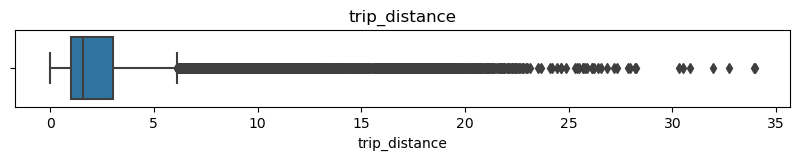

In [9]:
plt.figure(figsize=(10,1))
plt.title('trip_distance')
sns.boxplot(x=df2['trip_distance'])
plt.show()

In [10]:
long_dist_travel_df = df2[df2['trip_distance'] > 30]
num_long_dist_travels = long_dist_travel_df.shape[0]
print("Number of trips over 30 kms:", num_long_dist_travels)

Number of trips over 30 kms: 7


Let's take a look at these 7 lines with a distance of more than 30 kms:

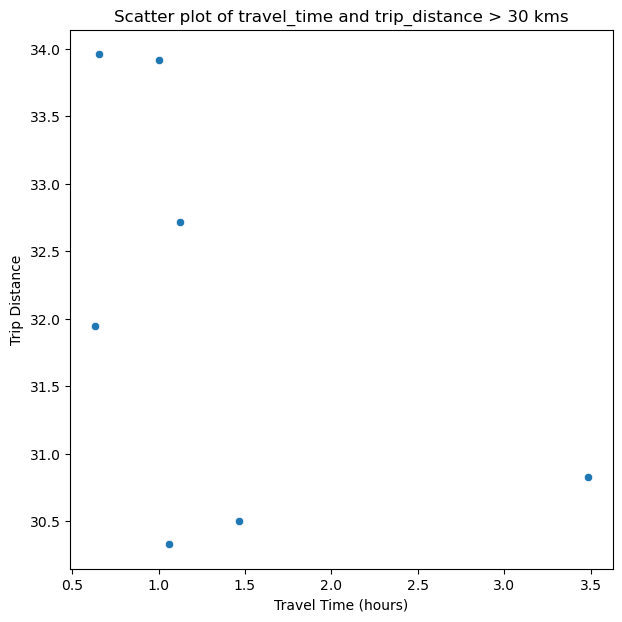

In [11]:
filtered_df2 = df2[df2['trip_distance'] > 30]

plt.figure(figsize=(7,7))
plt.title('Scatter plot of travel_time and trip_distance > 30 kms')
sns.scatterplot(x=filtered_df2['travel_time'], y=filtered_df2['trip_distance'])
plt.xlabel('Travel Time (hours)')
plt.ylabel('Trip Distance')
plt.show()

These data are quite disparate, so let's expand the number of data and draw a trend line.

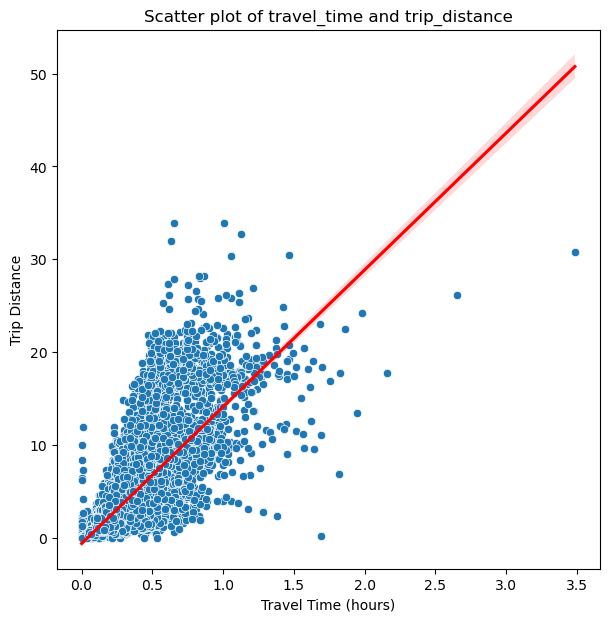

In [12]:
plt.figure(figsize=(7,7))
plt.title('Scatter plot of travel_time and trip_distance')
sns.scatterplot(x=df2['travel_time'], y=df2['trip_distance'])
sns.regplot(x=df2['travel_time'], y=df2['trip_distance'], scatter=False, line_kws={'color': 'red'})
plt.xlabel('Travel Time (hours)')
plt.ylabel('Trip Distance')
plt.show()


#### Conclusion
These data remain in line with the others despite their long travel distances. We can keep this datas with a distance trip longer than 30Km 

### 2.c. Analyze of total amout

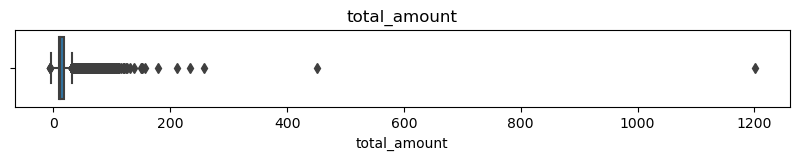

In [13]:
plt.figure(figsize=(10,1))
plt.title('total_amount')
sns.boxplot(x=df2['total_amount'])
plt.show()

In [14]:
df_filtered = df2[df2['total_amount'] > 200]
df_filtered

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,travel_time
8476,11157412,1,2017-02-06 05:50:10,2017-02-06 05:51:08,1,2.60,5,N,226,226,1,999.99,0.0,0.0,200.00,0.00,0.3,1200.29,0.016111
12511,107108848,2,2017-12-17 18:24:24,2017-12-17 18:24:42,1,0.00,5,N,265,265,1,175.00,0.0,0.0,46.69,11.75,0.3,233.74,0.005000
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21,1.002500
15474,55538852,2,2017-06-06 20:55:01,2017-06-06 20:55:06,1,0.00,5,N,265,265,1,200.00,0.0,0.5,11.00,0.00,0.3,211.80,0.001389
20312,107558404,2,2017-12-19 09:40:46,2017-12-19 09:40:55,2,0.00,5,N,265,265,2,450.00,0.0,0.0,0.00,0.00,0.3,450.30,0.002500


In [15]:
df_clean = df2.drop([8476, 12511,15474,20312])

In [16]:
df_clean

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,travel_time
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,0.234444
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,0.441667
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,0.120000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,0.504167
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,0.278611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,0.054444
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,0.680000
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,0.068889
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,0.198889
